# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
previsao_de_renda = 'https://raw.githubusercontent.com/Jefersonfranca/Analise_descritiva_identificando_outliers/main/previsao_de_renda.csv'
df = pd.read_csv(previsao_de_renda)

df = df.drop(columns='Unnamed: 0').set_index(keys='index', drop=True)
df.drop_duplicates(inplace=True)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16065,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,False,3018.59
3678,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
3405,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18


<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

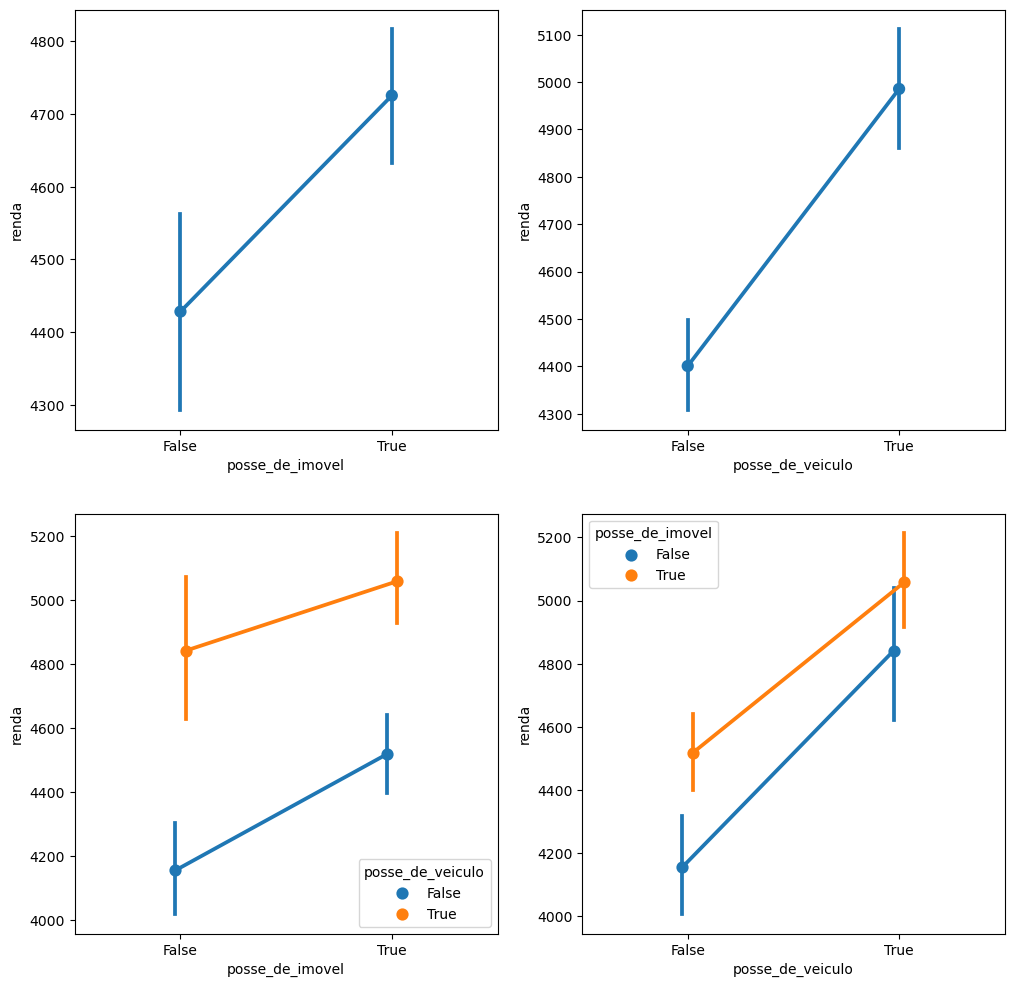

In [3]:
plt.rc('figure', figsize=(12,12))
fig, axes = plt.subplots(2,2)

sns.pointplot(x='posse_de_imovel', y='renda', data=df, dodge=True, ax=axes[0,0])

sns.pointplot(x='posse_de_veiculo', y='renda', data=df, dodge=True, ax=axes[0,1])

sns.pointplot(x='posse_de_imovel', y='renda', hue='posse_de_veiculo', data=df, dodge=True, ax=axes[1,0])

sns.pointplot(x='posse_de_veiculo', y='renda', hue='posse_de_imovel', data=df, dodge=True, ax=axes[1,1])


Um insight significativo da análise de dados é observado nos gráficos acima. Na primeira linha, ambos os gráficos mostram que as variáveis qualitativas discriminam a renda de forma estatisticamente significativa. No entanto, a posse de veículo parece ter uma maior influência na predição da renda, como evidenciado pelo distanciamento do intervalo de confiança entre os grupos que possuem e os que não possuem veículo.

Ao examinar os gráficos da segunda linha para um maior detalhamento, percebe-se que a posse de imóvel tem uma menor relevância, pois mesmo entre aqueles que possuem veículo, a renda é semelhante, independentemente da posse de imóvel. Isso sugere que a posse de veículo pode ser um indicador mais forte da renda do que a posse de imóvel.